In [4]:
import pandas as pd
import os
df = pd.read_csv('data/clean_data.csv') 


df_fe2 = df.copy()

#Dodanie zmiennej Is_USD
if 'Currency' in df_fe2.columns:
    df_fe2['Is_USD'] = (df_fe2['Currency'] == 'USD').astype(int)

df_fe2 = df_fe2.drop(columns=[col for col in df_fe2.columns if col.startswith('Branch_') or col.startswith('Currency_')])

for col in ['Branch', 'Currency']:
    if col in df_fe2.columns:
        df_fe2 = df_fe2.drop(columns=col)

print(df_fe2.head())


   Transaction Amount  Account Balance  Transaction_To_Balance_Ratio  \
0            0.536443         0.366206                      0.073268   
1            0.776897         0.285169                      0.135983   
2            0.486642         0.765944                      0.031838   
3            0.550743         0.622944                      0.044266   
4            0.656674         0.855213                      0.038438   

   Is_High_Value_Transaction  High_Balance_flag  \
0                          0                  0   
1                          1                  0   
2                          0                  1   
3                          0                  0   
4                          0                  1   

   Account_Transaction_Current - Debit  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    1   

   Acco

In [5]:
os.makedirs('data', exist_ok=True)
df_fe2.to_csv('data/final_data_fe2.csv', index=False)


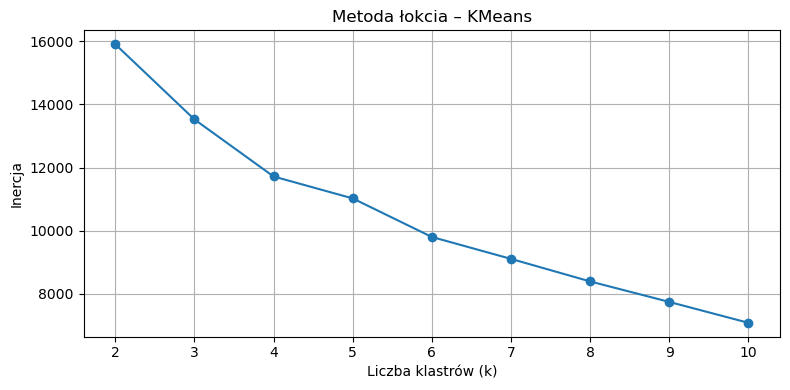

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_fe2)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Metoda łokcia – KMeans')
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Inercja')
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
k = 5 
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_fe2['KMeans_FE2'] = kmeans.fit_predict(df_fe2)


In [8]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

X_only = df_fe2.drop(columns='KMeans_FE2')
sil_score = silhouette_score(X_only, df_fe2['KMeans_FE2'])
db_score = davies_bouldin_score(X_only, df_fe2['KMeans_FE2'])

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Score: {db_score:.3f} ")


Silhouette Score: 0.234
Davies-Bouldin Score: 1.392 


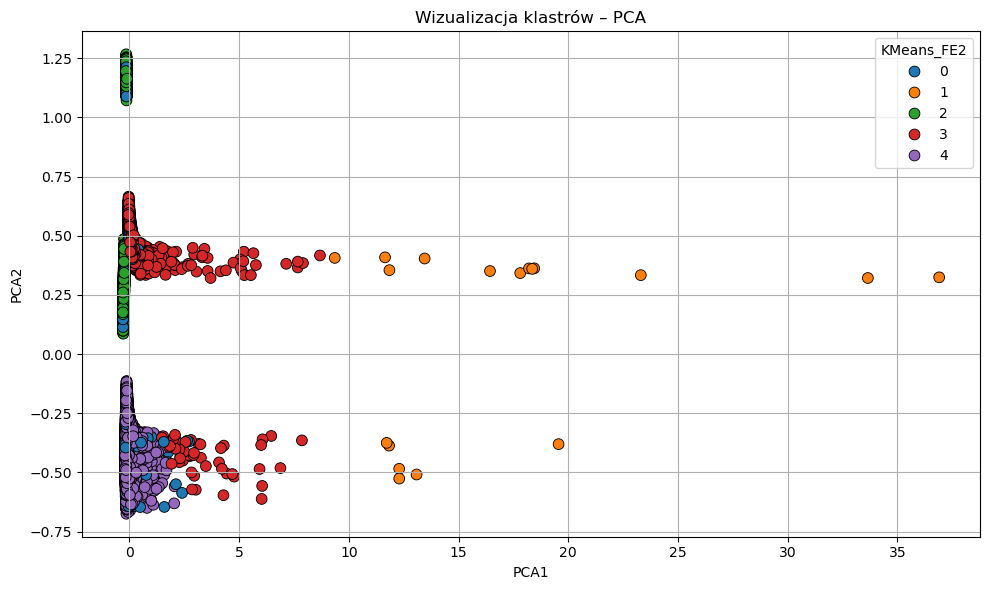

In [9]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_only)

df_fe2['PCA1'] = X_pca[:, 0]
df_fe2['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_fe2, x='PCA1', y='PCA2', hue='KMeans_FE2', palette='tab10', s=60, edgecolor='black')
plt.title('Wizualizacja klastrów – PCA')
plt.grid(True)
plt.tight_layout()
plt.show()


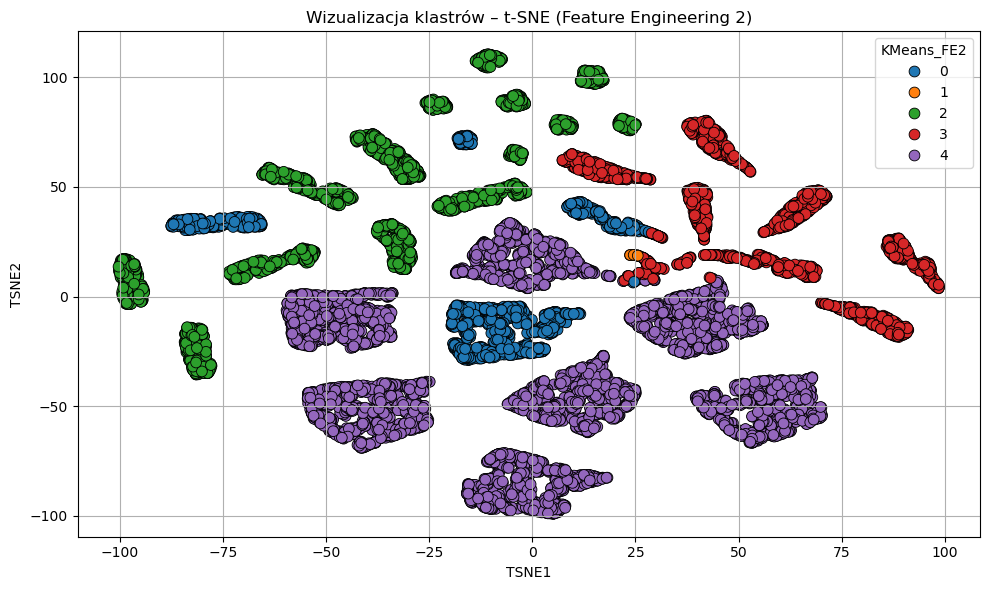

In [10]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

X_tsne_input = df_fe2.drop(columns=['KMeans_FE2'])

tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca', random_state=42)
X_tsne = tsne.fit_transform(X_tsne_input)

df_fe2['TSNE1'] = X_tsne[:, 0]
df_fe2['TSNE2'] = X_tsne[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_fe2,
    x='TSNE1',
    y='TSNE2',
    hue='KMeans_FE2',
    palette='tab10',
    s=60,
    edgecolor='black'
)
plt.title('Wizualizacja klastrów – t-SNE (Feature Engineering 2)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
cluster_profile = df_fe2.groupby('KMeans_FE2').mean().T.round(2)
display(cluster_profile)


KMeans_FE2,0,1,2,3,4
Transaction Amount,0.50,0.76,0.50,0.87,0.37
Account Balance,0.51,0.00,0.88,0.36,0.38
Transaction_To_Balance_Ratio,0.11,17.47,0.03,0.41,0.11
Is_High_Value_Transaction,0.23,0.67,0.25,0.97,0.00
High_Balance_flag,0.25,0.00,1.00,0.00,0.00
Account_Transaction_Current - Debit,0.00,0.22,0.13,0.14,0.14
Account_Transaction_Fixed Deposit - Credit,0.00,0.11,0.15,0.15,0.14
Account_Transaction_Fixed Deposit - Debit,0.00,0.06,0.13,0.14,0.14
Account_Transaction_Recurring Deposit - Credit,0.00,0.11,0.14,0.12,0.14
Account_Transaction_Recurring Deposit - Debit,1.00,0.06,0.00,0.01,0.00


## Podział na klastry zaproponowany przez LLM (GPT - 4o)

### **0 – Recurring-Focused Clients**
**Charakterystyka:**
- Średnie saldo konta (0.51) i przeciętna wartość transakcji (0.50).
- Bardzo wysoki udział transakcji typu *Recurring Deposit - Debit* (1.00).
- Niski udział pozostałych typów transakcji – sugeruje specyficzny, jednorodny wzorzec użycia konta.
- Wskaźnik wysokiej transakcji: 0.23 (poniżej średniej).
- Umiarkowany udział klientów o wysokim saldzie (0.25).

 *To prawdopodobnie klienci zautomatyzowani (np. subskrypcje, raty), których aktywność skupia się na jednej funkcji.*

---

### **1 – Overdrawn Power Users**
**Charakterystyka:**
- Bardzo wysokie transakcje (0.76) przy zerowym saldzie (0.00).
- Wskaźnik transakcji do salda: ekstremalnie wysoki (17.47).
- Duży udział użytkowników z transakcjami typu *Current - Debit* (0.22) i *Savings - Credit* (0.28).
- Wysoki udział dużych transakcji (0.67).
- Zero klientów z wysokim saldem (0.00).

 *Użytkownicy intensywnie korzystający z konta pomimo braku środków – prawdopodobnie kredytowani lub zadłużeni.*

---

### **2 – Wealthy but Passive**
**Charakterystyka:**
- Najwyższe saldo konta (0.88), ale transakcje niskie (0.50).
- Wskaźnik wysokiego salda: 1.00 – wszyscy klienci z dużym stanem konta.
- Niska wartość wskaźnika transakcji do salda (0.03).
- Niski udział wszystkich typów transakcji.
- Niski udział w transakcjach wysokowartościowych (0.25).

 *Zamożni, ale bierni klienci. Raczej trzymają środki niż nimi operują.*

---

### **3 – Premium Active Users**
**Charakterystyka:**
- Bardzo wysokie transakcje (0.87) przy niskim saldzie (0.36).
- Wysoki wskaźnik transakcji do salda (0.41) i bardzo wysoki udział dużych transakcji (0.97).
- Wysoka różnorodność i intensywność transakcji.
- Brak klientów z wysokim saldem (0.00).

 *Bardzo aktywni użytkownicy, często obracający środkami mimo ich ograniczonej ilości.*

---

### **4 – Low Value Generalists**
**Charakterystyka:**
- Niskie saldo (0.38) i niska wartość transakcji (0.37).
- Przeciętna różnorodność transakcji.
- Brak transakcji wysokowartościowych (0.00).
- Zero klientów z wysokim saldem (0.00).

 *Zwykli klienci detaliczni, nieaktywni finansowo – niska wartość dla banku.*

---
